In [38]:
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
from copy import copy
from scipy.ndimage import rotate

In [39]:
image = sk.io.imread('./../ppujol/super_collapsed/S4 D1-2 rapid collapse_HA.tif')
image = image[3]

In [40]:
image.shape

(360, 662, 685)

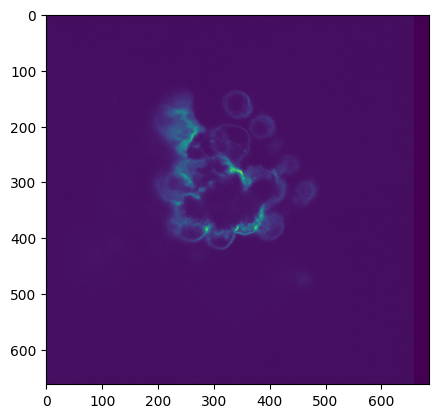

In [41]:
plt.imshow(image[200])
im = copy(image)

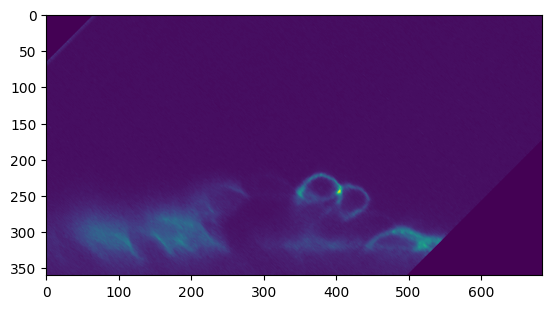

In [42]:
im = np.transpose(im, axes=(1,0,2))
plt.imshow(im[100])

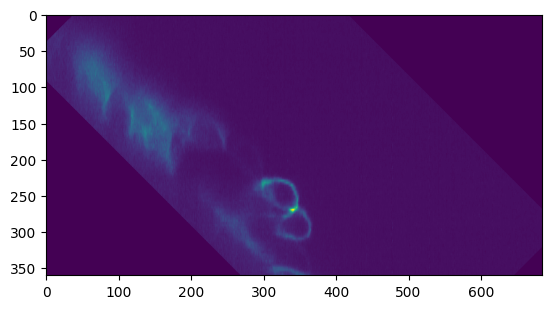

In [43]:
im_r = []
for i in im:
    im_r.append(rotate(i, -45, reshape=False, mode='constant', cval = 0))
im_r = np.array(im_r)
plt.imshow(im_r[100])

In [44]:
im_r = np.transpose(im_r, axes=(1,0,2))
im_r = np.transpose(im_r, axes=(0,2,1))
im_r = np.flip(im_r, axis=1)

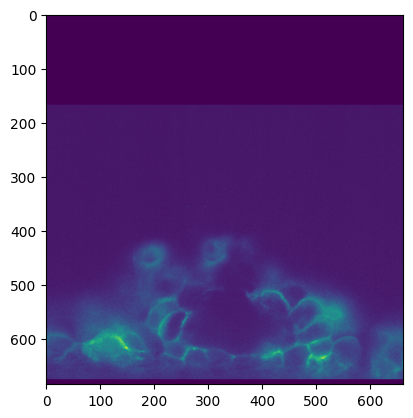

In [45]:
plt.imshow(im_r[100])

In [6]:
# # Define the number of interpolated layers
# num_interpolated_layers = 5

# # Extract the dimensions of the image
# depth, height, width = im.shape

# # Create an array to store the interpolated layers
# interpolated_layers = np.zeros((depth + (depth - 1) * num_interpolated_layers, height, width))

# # Interpolate along the Z-axis
# for z in range(depth - 1):
#     z0 = im[z, :, :]
#     z1 = im[ z + 1, :, :]
#     z_interpolated = np.linspace(0, 1, num_interpolated_layers + 2)[1:-1]  # Exclude endpoints
#     for i, alpha in enumerate(z_interpolated):
#         interpolated_layers[z * (num_interpolated_layers + 1) + i, :, :] = (1 - alpha) * z0 + alpha * z1

# # Optionally, you can add the original layers to the interpolated layers
# for z in range(depth):
#     interpolated_layers[ z * (num_interpolated_layers + 1), :, :] = im[z, :, :]

# # Now 'interpolated_layers' contains the 3D image with interpolated layers
# interpolated_layers.shape
# plt.imshow(interpolated_layers[6])

(1081, 2048, 1484)

In [46]:
import tifffile as tiff
tiff.imwrite('./../ppujol/super_collapsed/S4 D1-2 rapid collapse_HA reraw.tif', im_r.astype(np.uint16), imagej=True)